**Workshop on ML classification and regression methods**


Pronóstico Diario de Demanda de Pedidos

El pronóstico de demanda es el proceso de predecir la demanda futura de un producto o servicio. Es un aspecto crucial de la gestión de la cadena de suministro, el control de inventario y la planificación de la producción para las empresas. Para realizar un pronóstico diario de la demanda, generalmente necesitarías datos históricos de ventas o demanda a lo largo del tiempo.

Este conjunto de datos se recomienda para aprender y practicar habilidades en análisis exploratorio de datos, visualización de datos y técnicas de modelado de regresión. También te permite practicar con un gran número de características. Siéntete libre de explorar el conjunto de datos con múltiples técnicas de aprendizaje supervisado y no supervisado. El conjunto de datos fue recopilado durante 60 días y es una base de datos real de una empresa logística brasileña. El conjunto de datos tiene doce atributos predictivos y un objetivo que es el total de pedidos para el tratamiento diario.

Por lo tanto, debes llevar a cabo las siguientes actividades:
1. **Contexto empresarial:** Comprende claramente cuál es el objetivo comercial. En este caso, es predecir el número total de pedidos requeridos. Identifica las necesidades y expectativas de las partes interesadas y asegúrate de que el proyecto de modelado cumpla con estas necesidades. Obtén un profundo conocimiento del dominio en el que opera el negocio, incluyendo la industria, mercado, competidores y cualquier regulación relevante. Identifica factores que pueden afectar la demanda de pedidos, como eventos estacionales, promociones, cambios en la economía, tendencias del mercado, etc.
2. **Definir métricas de éxito:** Identifica los indicadores clave de rendimiento (KPIs) que se utilizarán para evaluar el éxito del modelo. En este caso, podrían ser la precisión de las predicciones, el error cuadrático medio (RMSE) o el error absoluto medio (MAE).
3. **Identificar limitaciones y restricciones:** Identifica cualquier limitación o restricción que pueda afectar el proceso de modelado, como presupuesto, recursos, tiempo o disponibilidad de datos.
4. **Definir hipótesis iniciales:** Formula hipótesis iniciales sobre cómo las variables o características pueden influir en la demanda de pedidos. Esto ayudará a guiar el análisis de datos y la construcción del modelo.
5. **Exploración de datos:** Realiza un análisis exploratorio de datos (EDA) para comprender la distribución de las variables, identificar valores atípicos y entender las relaciones entre las variables y la variable objetivo (el número total de pedidos). Visualiza los datos usando gráficos y estadísticas descriptivas.
6. **Preprocesamiento de datos:** Realiza ingeniería de características si es necesario. Esto podría implicar crear nuevas características a partir de las existentes o transformar características existentes. Separa los datos en conjuntos de entrenamiento y prueba para validación adicional.
7. **Selección de modelo:** Selecciona el tipo de modelo de regresión que mejor se ajuste a los datos y al problema. Ejemplos comunes incluyen regresión lineal, regresión Ridge, regresión Lasso, regresión polinómica, etc.
8. **Entrenamiento del modelo:** Utiliza el conjunto de datos de entrenamiento para ajustar el modelo seleccionado. Ajusta los hiperparámetros del modelo para obtener un rendimiento óptimo.
9. **Evaluación del modelo:** Utiliza el conjunto de datos de prueba para evaluar el rendimiento del modelo. Las métricas típicas de evaluación para modelos de regresión incluyen el error cuadrático medio (RMSE), el coeficiente de determinación (R²) y el error absoluto medio (MAE). Visualiza los resultados y compara las predicciones del modelo con los valores reales.
10. **Documentación y comunicación:** Documenta todo el proceso, desde la adquisición de datos hasta la implementación del modelo, para que otros miembros del equipo puedan entender y reproducir los resultados a través de un informe utilizando la plantilla de columna única de IEEE para comunicar los hallazgos y predicciones a las partes interesadas relevantes.

PD: Trabajar en parejas.

**DESARROLLO**

1. **Contexto empresarial:** El objetivo de la empresa para este caso es poder tener un sistema que pueda predecir el numero de pedidos que va a recibir según el tipo de orden, tipo de urgencia o tipo de sector de donde proviene la orden.
2. **Definir métricas de éxito:** Para identificar la eficiencia del sistema se hacen pruebas de error cuadrático medio (RMSE) y error absoluto medio(MAE).
3. **Identificar limitaciones y restricciones:** La cantidad de datos suministrados en el dataset podría llegar a ser una limitación, ya que entre mayor número de datos podemos mejorar el entrenamiento del programa y que resulte más preciso.
4. **Definir hipótesis iniciales:** El total de ordenes debería de variar según el día de la semana, habrán días que haya más flujo de ordenes que otro.
5. **Exploración de datos:** empezamos con la lectura del dataset suministrado.


In [85]:
##Librerias
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np       #Operaciones numéricas eficientes en Python.
import pandas as pd      #Manipulación y análisis de datos.
import seaborn as sns    #Visualización de datos estadísticos.


# Especifica el nombre del archivo CSV
nombre_archivo = 'Demand.csv'

sns.set_palette('husl')     #esquema de colores de las visualizaciones
import matplotlib.pyplot as plt    #crear gráficos y visualizaciones


In [87]:
# Carga el archivo CSV en un DataFrame (separacion ';'), indicando que el punto es el separador de miles
data = pd.read_csv(nombre_archivo,  sep=';', thousands='.')

#Muestra el contenido del DataFrame (el archivo CSV)
#data

In [89]:
#muestra los primeros datos del dataset
data.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,"539.577,,,"
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,"224.675,,,"
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,"129.412,,,"
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,"317.120,,,"
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,"210.517,,,"


In [91]:
#Asignar nombre de las columnas
data.columns=['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)', 'Non-urgent order','Urgent order','Order type A','Order type B', 'Order type C','Fiscal sector orders','Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

In [93]:
#Muestra informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64 
 1   Day of the week (Monday to Friday)                                  60 non-null     int64 
 2   Non-urgent order                                                    60 non-null     int64 
 3   Urgent order                                                        60 non-null     int64 
 4   Order type A                                                        60 non-null     int64 
 5   Order type B                                                        60 non-null     int64 
 6   Order type C                                                        60 non-null     int64 
 7   Fiscal sector orders        

In [95]:
#Cuenta el numero de veces que se conto un mismo valor en esta columna y lo devulve en orden decendente
data['Week of the month (first week, second, third, fourth or fifth week'].value_counts()

2    15
3    14
4    14
5     9
1     8
Name: Week of the month (first week, second, third, fourth or fifth week, dtype: int64

In [97]:
#entrega datos estadisticos del dataset
data.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172554.933333,118920.850000,52112.216667,109229.850000,139531.250000,9397.533333,44504.350000,46640.833333,79401.483333,23114.633333
std,1.282102,1.401775,69505.787985,27170.928513,18829.910604,50741.388224,41442.931565,23186.188109,12197.905134,45220.736293,40504.420041,13148.039829
min,1.000000,2.000000,43651.000000,77371.000000,21826.000000,25125.000000,74372.000000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000
25%,2.000000,3.000000,125348.000000,100888.000000,39456.250000,74916.250000,113632.250000,89.500000,34994.250000,20130.000000,50680.500000,12609.750000
50%,3.000000,4.000000,151062.500000,113114.500000,47166.500000,99482.000000,127990.000000,1635.000000,44312.000000,32527.500000,67181.000000,18011.500000
75%,4.000000,5.000000,194606.500000,132108.250000,58463.750000,132171.000000,160107.500000,12520.250000,52111.750000,45118.750000,94787.750000,31047.750000
max,5.000000,6.000000,435304.000000,223270.000000,118178.000000,267342.000000,302448.000000,169275.000000,71772.000000,210508.000000,188411.000000,73839.000000


6. **Preprocesamiento de datos:** Luego de observar los resultados de las funciones aplicadas al dataset, encontramos que al aplicar la funcion 'data.info()' la columna de 'Target (Total orders)' leia valores de 'others' lo cual no resultaba logico, pues se trata de la cantidad total de ordenes recibidas en el dia y eso puede ser cuantificado con los datos que ya tenemos en la tabla y dar resultados en numeros enteros. Por lo tanto se procede a convertir esos datos de 'others' en 'int'

In [100]:
import csv

# Nombre del archivo CSV de entrada y salida
archivo_entrada = 'Demand.csv'
archivo_salida = 'salida.csv'

# Columnas que deseas sumar y reemplazar
columna_a_sumar1 = 'Non-urgent order'
columna_a_sumar2 = 'Urgent order'
nueva_columna = 'Target (Total orders)'


# Leer el archivo CSV y realizar la operación
with open(archivo_entrada, 'r', encoding='utf-8') as entrada, open(archivo_salida, 'w', newline='', encoding='utf-8') as salida:
    # Crear un objeto DictReader para leer el archivo CSV de entrada con punto y coma como delimitador
    lector_csv = csv.DictReader(entrada, delimiter=';')
    
    # Obtener los nombres de las columnas del archivo CSV
    nombres_columnas = lector_csv.fieldnames + [nueva_columna]  # Agregar el nombre de la nueva columna
    
    # Crear un objeto DictWriter para escribir el archivo CSV de salida
    escritor_csv = csv.DictWriter(salida, fieldnames=nombres_columnas, delimiter=';')
    
    # Escribir los encabezados en el archivo de salida
    escritor_csv.writeheader()
    
    # Procesar cada fila del archivo CSV de entrada
    for fila in lector_csv:
        # Convertir las columnas de texto a números, eliminando puntos de miles
        valor_columna1 = int(fila[columna_a_sumar1].replace('.', ''))
        valor_columna2 = int(fila[columna_a_sumar2].replace('.', ''))
        
        # Calcular la suma de las columnas y agregarla como una nueva columna
        fila[nueva_columna] = valor_columna1 + valor_columna2
        
        # Escribir la fila en el archivo de salida
        escritor_csv.writerow(fila)

print(f'Se ha procesado el archivo CSV. La nueva columna "{nueva_columna}" ha sido agregada con la suma de "{columna_a_sumar1}" y "{columna_a_sumar2}".')


Se ha procesado el archivo CSV. La nueva columna "Target (Total orders)" ha sido agregada con la suma de "Non-urgent order" y "Urgent order".


**ARCHIVO NUEVO**

En el archivo 'salida.csv' tenemos el dataset configurado con todos los valores enteros

In [103]:
#Leemos el archivo
nombre_archivo ='salida.csv'

# Carga el archivo CSV en un DataFrame (separacion ';'), indicando que el punto es el separador de miles
df = pd.read_csv(nombre_archivo,  sep=';', thousands='.')

In [105]:
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Target (Total orders).1
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577,539577
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675,224675
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,128026,128026
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,298964,298964
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,204058,204058


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64
 1   Day of the week (Monday to Friday)                                  60 non-null     int64
 2   Non-urgent order                                                    60 non-null     int64
 3   Urgent order                                                        60 non-null     int64
 4   Order type A                                                        60 non-null     int64
 5   Order type B                                                        60 non-null     int64
 6   Order type C                                                        60 non-null     int64
 7   Fiscal sector orders                 

In [109]:
df.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
Target (Total orders).1                                         

In [111]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Target (Total orders).1
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172554.933333,118920.850000,52112.216667,109229.850000,139531.250000,9397.533333,44504.350000,46640.833333,79401.483333,23114.633333,291475.783333,291475.783333
std,1.282102,1.401775,69505.787985,27170.928513,18829.910604,50741.388224,41442.931565,23186.188109,12197.905134,45220.736293,40504.420041,13148.039829,87764.411081,87764.411081
min,1.000000,2.000000,43651.000000,77371.000000,21826.000000,25125.000000,74372.000000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,128026.000000,128026.000000
25%,2.000000,3.000000,125348.000000,100888.000000,39456.250000,74916.250000,113632.250000,89.500000,34994.250000,20130.000000,50680.500000,12609.750000,233311.250000,233311.250000
50%,3.000000,4.000000,151062.500000,113114.500000,47166.500000,99482.000000,127990.000000,1635.000000,44312.000000,32527.500000,67181.000000,18011.500000,279835.500000,279835.500000
75%,4.000000,5.000000,194606.500000,132108.250000,58463.750000,132171.000000,160107.500000,12520.250000,52111.750000,45118.750000,94787.750000,31047.750000,320844.250000,320844.250000
max,5.000000,6.000000,435304.000000,223270.000000,118178.000000,267342.000000,302448.000000,169275.000000,71772.000000,210508.000000,188411.000000,73839.000000,616453.000000,616453.000000


In [113]:
#calcular la correlación entre las columnas numéricas 
df.corr()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Target (Total orders).1
"Week of the month (first week, second, third, fourth or fifth week",1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,-0.050302,-0.194088,0.392310,0.147086,-0.157059,0.229431,0.229431
Day of the week (Monday to Friday),-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,0.171874,-0.339485,-0.051815,-0.577035,-0.012251,-0.489807,-0.489807
Non-urgent order,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.048181,0.246937,0.732357,0.788192,0.132857,0.966814,0.966814
Urgent order,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.044740,0.242268,0.230618,0.660868,0.031260,0.756885,0.756885
Order type A,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,-0.003605,-0.151762,0.675328,0.294374,0.230369,0.572407,0.572407
Order type B,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,0.404545,0.127111,0.592845,0.713674,0.067325,0.812656,0.812656
Order type C,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,-0.044340,0.442404,0.330186,0.718739,0.031053,0.833553,0.833553
Fiscal sector orders,-0.050302,0.171874,-0.048181,-0.044740,-0.003605,0.404545,-0.044340,1.000000,-0.078475,-0.029636,-0.051661,-0.044976,-0.052008,-0.052008
Orders from the traffic controller sector,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,-0.078475,1.000000,-0.162309,0.240450,0.231614,0.270567,0.270567
Banking orders (1),0.392310,-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,-0.029636,-0.162309,1.000000,0.262905,0.221335,0.651393,0.651393


<Axes: >

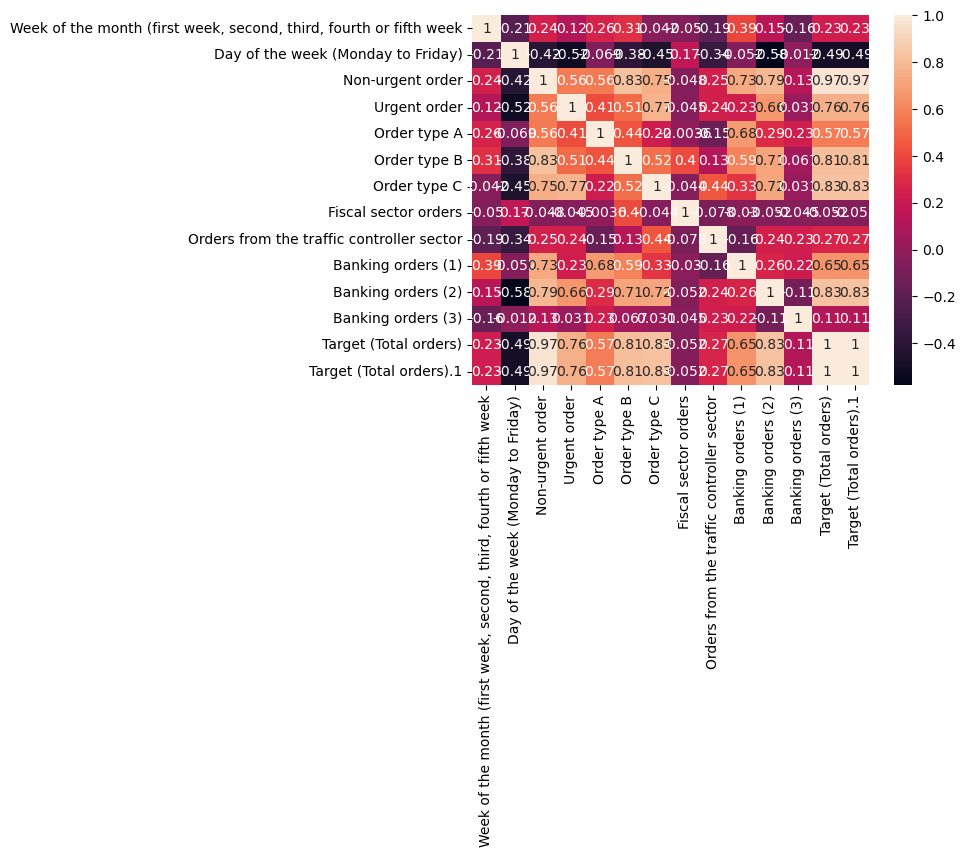

In [115]:
#Graficamos la correlacion para tenerlo de manera mas visual
sns.heatmap(df.corr(),annot=True)

7. **Selección de modelo:** Debido a la naturaleza del caso y luego de revisar los diferentes tipos de regresion que podemos aplicar, decidimos utilizar la regresion por arboles decision, ya que modela la relación entre variables predictoras y la variable de respuesta. Este 
modelo puede capturar patrones complejos y no lineales en los datos sin requerir supuestos sobre la forma de la relación y los valores atipicos no lo afectan en mayor magnitud.

In [141]:
y=df['Target (Total orders)']    #Columna del total de ordenes recibidas
x=df.drop(columns=['Target (Total orders)']) #Resto de columnas

In [227]:
#dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) #0.3 indica que el 30% del dataset se utilizara para datos de prueba

In [228]:
#construir modelos de regresión basados en árboles de decisión.
from sklearn.tree import DecisionTreeRegressor

#Error cuadrarico("squared_error")
d=DecisionTreeRegressor(criterion="squared_error")   

8. **Entrenamiento del modelo:** 

In [232]:
#entrenar el modelo de regresión basado en árbol de decisión utilizando los datos de entrenamiento.
d.fit(x_train,y_train)

DecisionTreeRegressor()

9. **Evaluación del modelo:** Utiliza el conjunto de datos de prueba para evaluar el rendimiento del modelo. Las métricas típicas de evaluación para modelos de regresión incluyen el error cuadrático medio (RMSE), el coeficiente de determinación (R²) y el error absoluto medio (MAE). Visualiza los resultados y compara las predicciones del modelo con los valores reales.

In [235]:
#Devuelve que tan cercanas estan las predicciones al modelo de prueba real
d.score(x_test,y_test) #Entre más cerca de 1, mejor se ajustan las predicciones del modelo a los datos reales del conjunto de prueba

0.8965855068158023

In [237]:
y_pred=d.predict(x_test)
print((y_pred-y_test).abs().mean()*1000) 

18059388.88888889


In [239]:
#Error absoluto ("absolute_error")
dt=DecisionTreeRegressor(criterion="absolute_error") 

In [241]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [243]:
dt.score(x_test,y_test)

0.9119734019755806

In [224]:
pred_y=dt.predict(x_test)
print((pred_y-y_test).abs().mean()*1000)

21587500.0


**Resultados**

Con base en los resultados obtenidos al dividir el conjunto de datos en un 30% para pruebas y un 70% para entrenamiento, hemos logrado obtener un rendimiento bastante sólido para nuestro modelo de regresión de árbol de decisión. Al evaluar el modelo utilizando el error cuadrático y el error absoluto, hemos observado que:

Error Cuadrático Medio (ECM): Logramos un 89% de precisión en nuestras predicciones, lo que significa que el modelo es capaz de explicar el 89% de la variabilidad en los datos utilizando el ECM como métrica.

Error Absoluto Medio (EAM): Al evaluar el modelo utilizando el EAM, hemos alcanzado un 91% de precisión. Esto indica que, en promedio, nuestras predicciones están desviadas en un 9% del valor real.

Estos resultados son muy positivos y sugieren que el modelo de regresión de árbol de decisión ha aprendido patrones importantes en los datos. Para este caso 89% y 91% pueden llegar a ser suficientes para este caso en especifico, ya que eventos externos pueden llegar a influir en la cantidad de solicitudes que se realicen y eso puedo acarrear ese error de aproximadamente un 10%.

**SOLICITUD DE PREDICCION**

Paso extra

In [ ]:
#Solicitud de prueba
Menu1 = True
Menu2 = False

#Menu dia
while Menu1:
    print("Dias de la semana en servicio:")
    print("Lunes-2")      
    print("Martes-3") 
    print("Miercoles-4") 
    print("Jueves-5") 
    print("Viernes-6") 
    try:
        dia = int (input("Que dia de la semana quieres seleccionar(2-6): "))
        if 2 <= dia <= 6:
            # Salir del bucle si el número está en el rango válido
            Menu1 = False
            Menu2 = True
        else:
            print("El número debe estar entre 2 y 6. Inténtalo nuevamente.")
    except ValueError:
        print("Por favor, ingresa un número entero válido.")  # Capturar errores si el usuario no ingresa un número entero

        
#Menu interes
while Menu2:
    print("\n\nDatos de interes:")
    print("1. Non-urgent order")      
    print("2. Urgent order") 
    print("3. Order type A") 
    print("4. Order type B") 
    print("5. Order type C") 
    print("6. Fiscal sector orders") 
    print("7. Orders from the traffic controller sector") 
    print("8. Banking orders (1)") 
    print("9. Banking orders (2)")
    print("10. Banking orders (3)")
    print("11. Target (Total orders)")
    
    try:
        interes = int (input("Que tipo de dato quiere predecir seleccionar(1-11): "))
        if 1 <= interes <= 11:
            # Salir del bucle si el número está en el rango válido
            Menu2 = False
        else:
            print("El número debe estar entre 1 y 11. Inténtalo nuevamente.")
    except ValueError:
        print("Por favor, ingresa un número entero válido.")  # Capturar errores si el usuario no ingresa un número entero
    



Tipos_Datos = [' ','Non-urgent order','Urgent order','Order type A','Order type B', 'Order type C','Fiscal sector orders','Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']
x = Tipos_Datos[interes]
y = dia

print("\nLa prediccion que quiere realizar es de", x, "para el dia", y)

Dias de la semana en servicio:
Lunes-2
Martes-3
Miercoles-4
Jueves-5
Viernes-6
